# Support Vector Machines

A way to classify higher-dimensional data.
- Finds higher-dimensional *support* vectors across wich to dividde the data
- Use the *kernel trick* to represent data in higher-dimensional spaces to find hyperplanes that might not be apparent in lower dimensions
- Supervised learning

## Support Vector Classification
- In practicee you'll use something called SVC to classify data using SVM.
- You can use different "kernels" with SVC. Some will work better than others for a given data set.

# Code

In [3]:
import numpy as np

# Cria clusters fictícios de renda/idade para N pessoas em k clusters
def createClusteredData(N, k):
    # Define a seed para reprodutibilidade
    np.random.seed(1234)
    # Calcula o número de pontos por cluster
    pointsPerCluster = float(N) / k
    X = []
    y = []
    # Itera sobre o número de clusters
    for i in range(k):
        # Gera o centroide de renda
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        # Gera o centroide de idade
        ageCentroid = np.random.uniform(20.0, 70.0)
        # Gera pontos ao redor dos centroides
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)  
    # Converte as listas em arrays NumPy
    X = np.array(X)
    y = np.array(y)
    return X, y


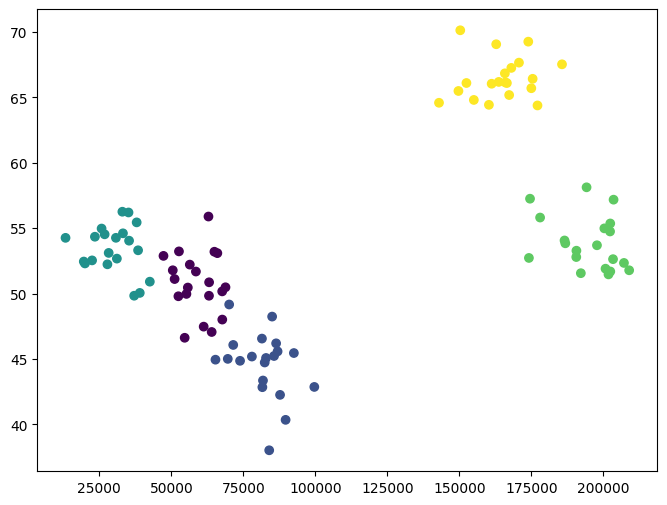

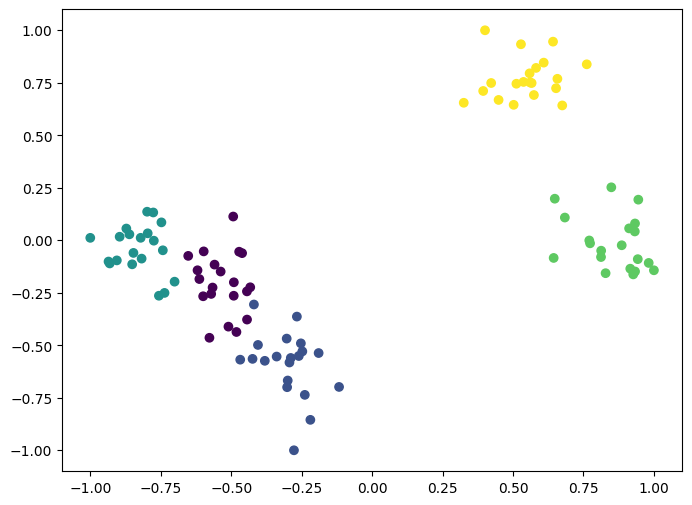

In [4]:
# Importa bibliotecas
%matplotlib inline
from pylab import *
from sklearn.preprocessing import MinMaxScaler

# Gera os dados
(X, y) = createClusteredData(100, 5)

# gera um scatter dos dados e plota
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(float))
plt.show()

# Escala os dados
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X = scaling.transform(X)

# Gera um scatter dos pontos normalizados e plota 
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(float))
plt.show()

In [5]:
# Import da biblioteca
from sklearn import svm, datasets

# SVC com kernel linear com parametro de regularização 1
C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

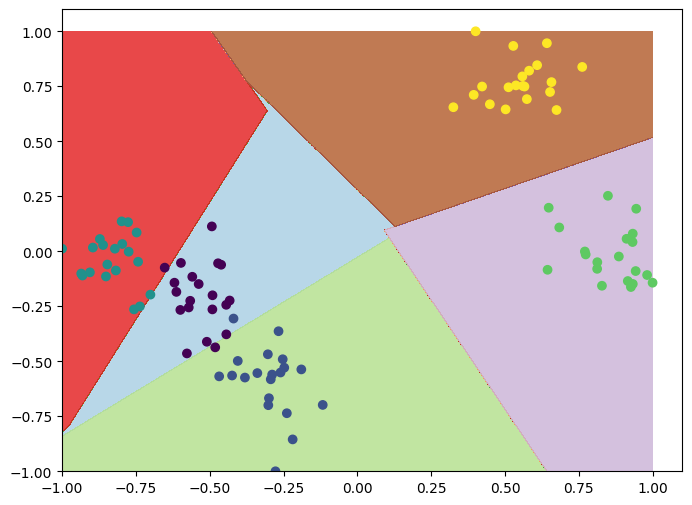

In [6]:
def plotPredictions(clf):
    # Cria um grid de pontos para amostrar
    xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                         np.arange(-1, 1, .001))
    
    # Converte para arrays Numpy
    npx = xx.ravel()
    npy = yy.ravel()
    
    # Converte para uma lista de pontos 2D (renda, idade)
    samplePoints = np.c_[npx, npy]
    
    # Gera os rótulos previstos 
    Z = clf.predict(samplePoints)

    # Define o tamanho da figura
    plt.figure(figsize=(8, 6))
    # Redimensiona os resultados para corresponder à dimensão de xx
    Z = Z.reshape(xx.shape)
    # Desenha o contorno dos clusters
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    # Desenha os pontos originais
    plt.scatter(X[:, 0], X[:, 1], c=y.astype(float))
    plt.show()

# Plota as previsões usando o modelo treinado
plotPredictions(svc)


In [7]:
print(svc.predict(scaling.transform([[200000, 40]])))

[3]


In [8]:
print(svc.predict(scaling.transform([[50000, 65]])))

[2]


## Activity

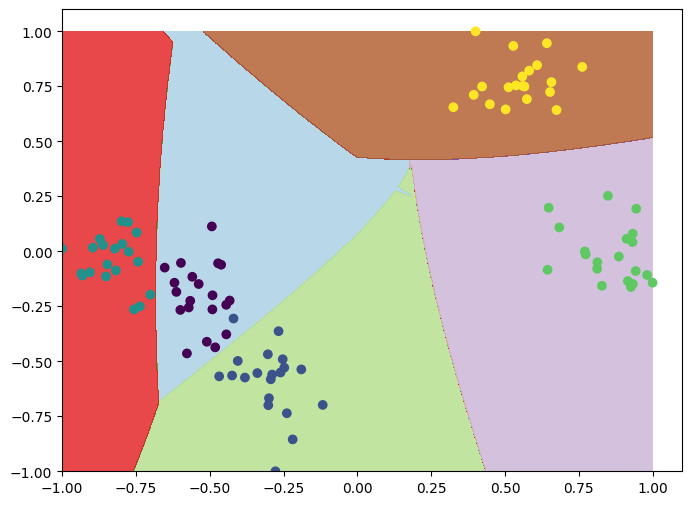

In [10]:
# Polynomial kernel
# Parâmetros: degree (grau do polinômio), coef0 (termo independente), gamma (coeficiente do kernel).
degree = 3
coef0 = 1
gamma = 'scale'  # pode ser 'scale', 'auto', ou um valor numérico
svc_poly = svm.SVC(kernel='poly', C=C, degree=degree, coef0=coef0, gamma=gamma).fit(X, y)


plotPredictions(svc_poly)

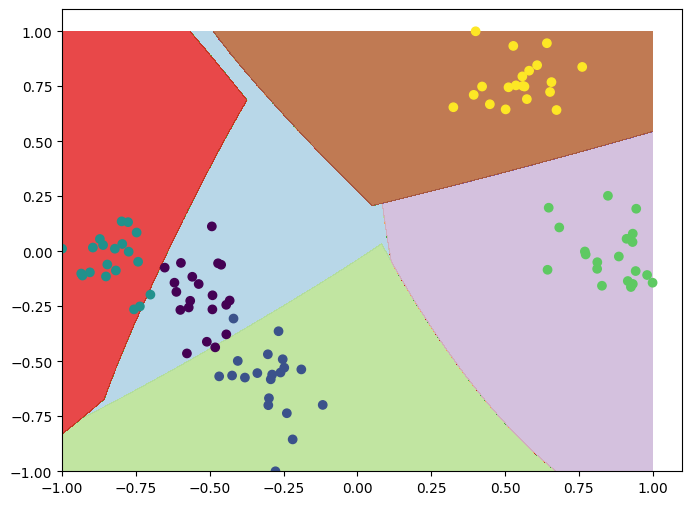

In [11]:
# Radial Basis Function (RBF) kernel
# Parâmetro: gamma (coeficiente do kernel).
gamma = 'scale'  # pode ser 'scale', 'auto', ou um valor numérico
svc_rbf = svm.SVC(kernel='rbf', C=C, gamma=gamma).fit(X, y)

plotPredictions(svc_rbf)

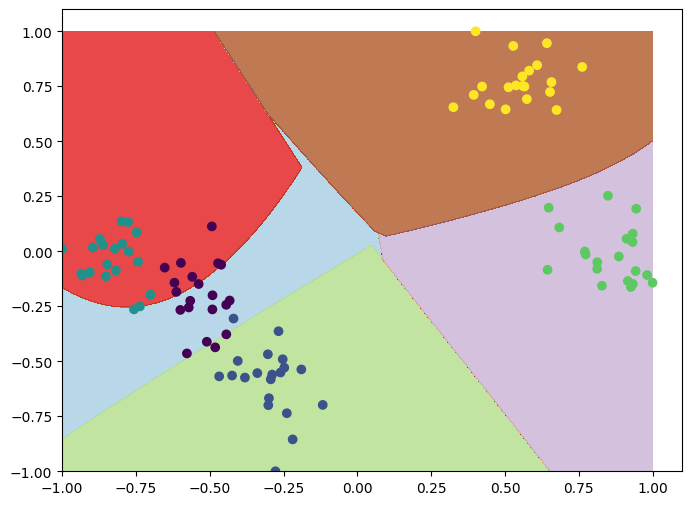

In [12]:
# Sigmoid kernel
# Parâmetros: coef0 (termo independente), gamma (coeficiente do kernel).
coef0 = 0
gamma = 'scale'  # pode ser 'scale', 'auto', ou um valor numérico
svc_sigmoid = svm.SVC(kernel='sigmoid', C=C, coef0=coef0, gamma=gamma).fit(X, y)

plotPredictions(svc_sigmoid)